# Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df = pd.read_csv('/content/flipkart_data.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,9976.0,4.215417,1.167911,1.0,4.0,5.0,5.0,5.0


In [5]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [6]:
df.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [7]:
df.dtypes

,0
review,object
rating,int64


In [9]:
df.nunique()

,0
review,7694
rating,5


In [16]:
df.value_counts('rating')

,count
rating,
5,5726
4,2365
3,884
1,691
2,310


Graphs

<Axes: xlabel='rating', ylabel='count'>

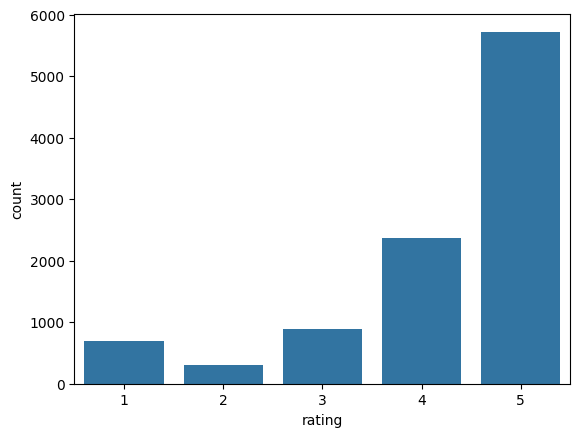

In [12]:
sns.countplot(data=df, x='rating')

([<matplotlib.patches.Wedge at 0x7e13932e2fd0>,
 [Text(-0.27638486995368106, 1.1677377289702886, '5'),
  Text(-0.38874445125555707, -1.029017857774109, '4'),
  Text(0.6761231353908002, -0.8676736170872744, '3'),
  Text(1.0075776057583583, -0.44134721974229607, '1'),
  Text(1.0947625053598895, -0.10721500295265568, '2')],
 [Text(-0.16122450747298062, 0.681180341899335, '57.4%'),
  Text(-0.21204242795757655, -0.5612824678767866, '23.7%'),
  Text(0.36879443748589097, -0.4732765184112405, '8.9%'),
  Text(0.5495877849591044, -0.24073484713216148, '6.9%'),
  Text(0.5971431847417579, -0.05848091070144855, '3.1%')])

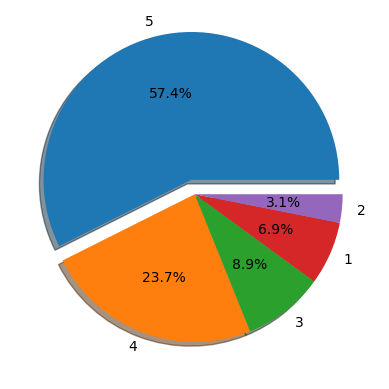

In [22]:
plt.pie(df.value_counts('rating'), labels=df.value_counts('rating').index, autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0])

# Data Cleaning/Processing

In [23]:
df.isnull().sum()

,0
review,0
rating,0


In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
df_cleaned

,review,rating,sentiment
0,nice produt. like design lot. easy carry. and....,5,1
1,awesome sound....very pretty see nd sound qual...,5,1
2,awesome sound quality. pros 7-8 hrs battery li...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1
...,...,...,...
9971,goodread,5,1
9972,everything amazimg built light..read,5,1
9973,goodread,5,1
9974,best headphone ever used....read,5,1


In [33]:
df_cleaned.value_counts('sentiment')

,count
sentiment,
1,8091
0,1885


([<matplotlib.patches.Wedge at 0x7e138f3c6410>,
 [Text(-0.9947089924559336, 0.6712332085998889, '1'),
  Text(0.9118167769071365, -0.6152968107756461, '0')],
 [Text(-0.5802469122659611, 0.3915527050166018, '81.1%'),
  Text(0.49735460558571076, -0.3356164422412615, '18.9%')])

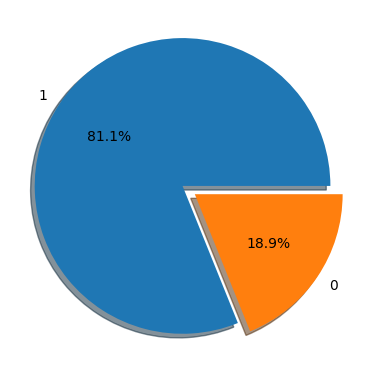

In [37]:
plt.pie(df_cleaned.value_counts('sentiment'), labels=df_cleaned.value_counts('sentiment').index, autopct='%1.1f%%',shadow=True,explode=[0.1,0])

# Word Cloud for Positive Reviews

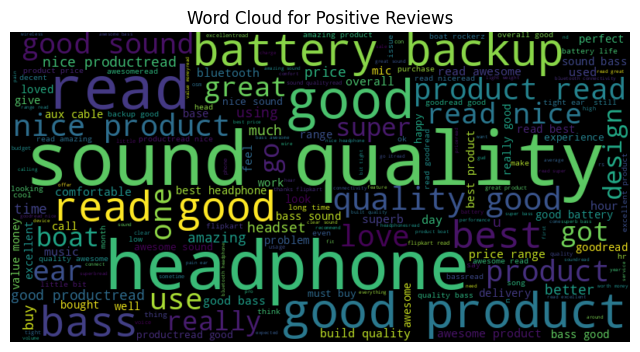

In [38]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

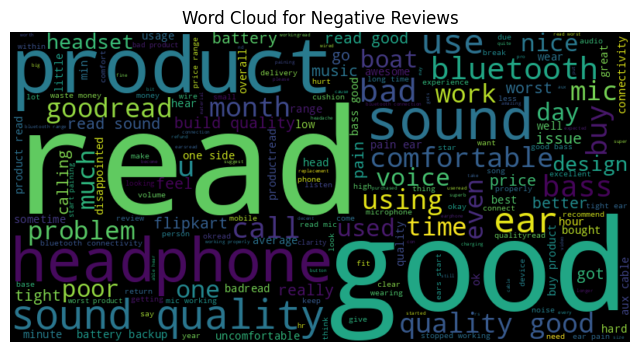

In [40]:
negative_reviews = df_cleaned[df_cleaned['sentiment'] == 0]['review']
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Vectorizing the Text Data

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

# Model Training, Evaluation and Prediction

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# By Decision Tree Classifier



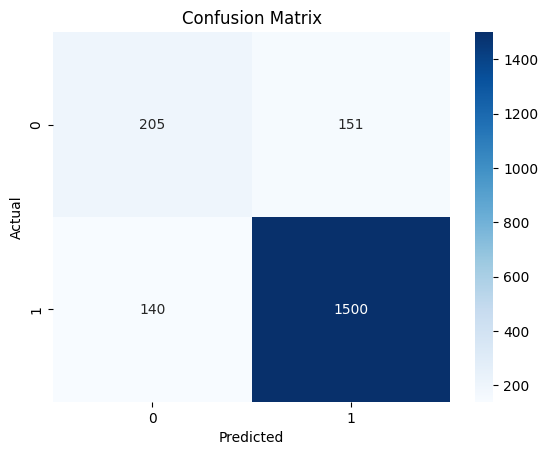

0.8542084168336673


In [58]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

# By Random Forest Classifier

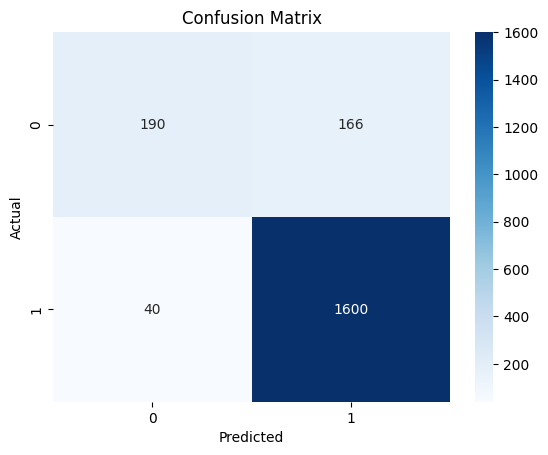

0.8967935871743486


In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)